PAS 1 ANALITZAR NOSTRE DATASET (PRACTICA 1)

In [3]:
%matplotlib widget
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
from ipywidgets import interact

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('pokemon.csv')
# dataset = dataset.drop(['japanese_name', 'name', 'type1', 'type2','abilities'], axis=1) # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
dataset = dataset.drop(['japanese_name', 'name', 'type1', 'type2'], axis=1) # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
data = dataset.values

x = data[:, 0:-2] # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
y = data[:, -1]

index = dataset.columns[:40]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (801, 37)
Dimensionalitat de les entrades X (801, 35)
Dimensionalitat de l'atribut Y (801,)


D'aqui veiem que la nostra base de dades presenta 801 elements. Ara mirarem si presenta valors no existents, es a dir que el seu valor sigui NaN. Aquests valors poden fer variar el resultat del nostre model i és important tenir-los en compte.

In [2]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classfication         0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64


In [3]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.000,1.000,1.000,0.500,0.500,0.500,2.000,2.000,1.000,0.250,1.000,2.000,1.000,1.000,2.000,1.000,1.000,0.500,49,5120,70,318,45,Seed Pokémon,49,1059860,0.700,45,88.100,1,65,65,45,6.900,1,0
1,"['Overgrow', 'Chlorophyll']",1.000,1.000,1.000,0.500,0.500,0.500,2.000,2.000,1.000,0.250,1.000,2.000,1.000,1.000,2.000,1.000,1.000,0.500,62,5120,70,405,45,Seed Pokémon,63,1059860,1.000,60,88.100,2,80,80,60,13.000,1,0
2,"['Overgrow', 'Chlorophyll']",1.000,1.000,1.000,0.500,0.500,0.500,2.000,2.000,1.000,0.250,1.000,2.000,1.000,1.000,2.000,1.000,1.000,0.500,100,5120,70,625,45,Seed Pokémon,123,1059860,2.000,80,88.100,3,122,120,80,100.000,1,0
3,"['Blaze', 'Solar Power']",0.500,1.000,1.000,1.000,0.500,1.000,0.500,1.000,1.000,0.500,2.000,0.500,1.000,1.000,1.000,2.000,0.500,2.000,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.600,39,88.100,4,60,50,65,8.500,1,0
4,"['Blaze', 'Solar Power']",0.500,1.000,1.000,1.000,0.500,1.000,0.500,1.000,1.000,0.500,2.000,0.500,1.000,1.000,1.000,2.000,0.500,2.000,64,5120,70,405,45,Flame Pokémon,58,1059860,1.100,58,88.100,5,80,65,80,19.000,1,0


Podem observar estadístiques de la nostra base de dades, com la desviació standard d'aquesta (std) , la mitjana de cada variable (mean) entre altres. Aixó ens serveix per descobrir quina distribució segueix cada variable i el seu tipus.

In [4]:
dataset.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,781.000,801.000,703.000,801.000,801.000,801.000,801.000,781.000,801.000,801.000
mean,0.996,1.057,0.969,1.074,1.069,1.066,1.135,1.193,0.985,1.034,1.098,1.208,0.887,0.975,1.005,1.250,0.983,1.058,77.858,7191.011,65.362,428.377,73.009,1054995.905,1.164,68.959,55.156,401.000,71.306,70.911,66.335,61.378,3.690,0.087
std,0.597,0.438,0.353,0.655,0.522,0.717,0.692,0.604,0.558,0.789,0.739,0.735,0.266,0.549,0.495,0.697,0.500,0.607,32.159,6558.220,19.599,119.204,30.769,160255.835,1.080,26.576,20.262,231.373,32.354,27.943,28.908,109.355,1.930,0.283
min,0.250,0.250,0.000,0.000,0.250,0.000,0.250,0.250,0.000,0.250,0.000,0.250,0.000,0.000,0.000,0.250,0.250,0.250,5.000,1280.000,0.000,180.000,5.000,600000.000,0.100,1.000,0.000,1.000,10.000,20.000,5.000,0.100,1.000,0.000
25%,0.500,1.000,1.000,0.500,1.000,0.500,0.500,1.000,1.000,0.500,1.000,0.500,1.000,0.500,1.000,1.000,0.500,0.500,55.000,5120.000,70.000,320.000,50.000,1000000.000,0.600,50.000,50.000,201.000,45.000,50.000,45.000,9.000,2.000,0.000
50%,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,75.000,5120.000,70.000,435.000,70.000,1000000.000,1.000,65.000,50.000,401.000,65.000,66.000,65.000,27.300,4.000,0.000
75%,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,2.000,1.000,1.000,100.000,6400.000,70.000,505.000,90.000,1059860.000,1.500,80.000,50.000,601.000,91.000,90.000,85.000,64.800,5.000,0.000
max,4.000,4.000,2.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,1.000,4.000,4.000,4.000,4.000,4.000,185.000,30720.000,140.000,780.000,230.000,1640000.000,14.500,255.000,100.000,801.000,194.000,230.000,180.000,999.900,7.000,1.000


[0.30329459 0.87348834 0.48543982 0.36103809 0.32215494 0.30840535
 0.40628116 0.34324053 0.31163908 0.39302299 1.        ]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
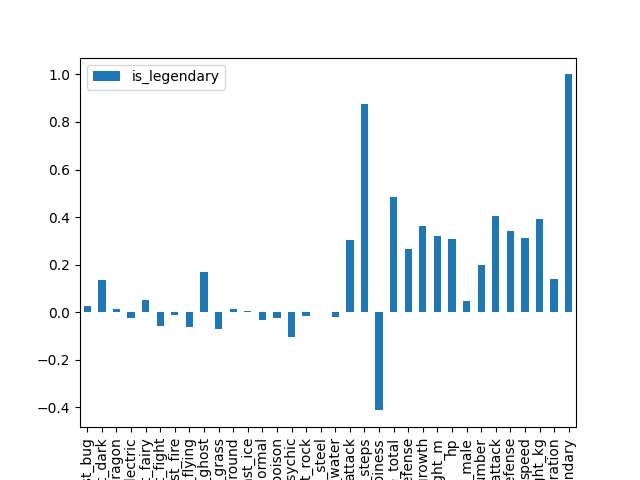

In [4]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

# print("Per visualitzar la correlació entre els atributs d'entrada y el atribut target:")
# print(correlacio.is_legendary.to_frame())

# ax = sns.heatmap(correlacio.is_legendary.to_frame() , annot=True, linewidths=.5)

correlacio.is_legendary.to_frame().plot.bar()

values = correlacio.is_legendary.values
values = values[values > 0.3]

print(values)

def clean_dataset(dataset: pd.core.frame.DataFrame, type = 'default') -> pd.core.frame.DataFrame:
    """
    Funció que processa els valors "NULLS" d'un dataset aplicant l'estratègia o tractament especificat
    :param dataset: DataFrame amb la informació que es vol filtrar
    :param type: Indica el tipus de tractament dels  "NaN"
    :return: DataFrame aplicant el mètode especificat a totes les línies amb valors "NaN"
    """
    if type == 'default':
        # Deletes all rows with missing values
        return dataset.dropna()
    elif type == 'backfill':
        # Applies pandas method of backfilling
        return dataset.fillna(method='backfill', axis=1)
    elif type == 'mean':
        # Replaces missing values with the mean of the column
        return dataset.fillna(dataset.mean())
    else:
        print("::-> ERROR : clean_dataset - " + str(type) + " is not a valid option...")


In [5]:
from sklearn import preprocessing

dataset = load_dataset('pokemon.csv')
#dataset = dataset.drop(['japanese_name', 'name', 'type1', 'type2','abilities','classfication'], axis=1) # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.

#Error en linia 773. Parametres no valids
dataset = dataset.drop(index=773, axis=0)


# One Hot Encoder
# Abilities
from sklearn.preprocessing import OneHotEncoder
# Declarem encoder tipus OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Declarem Dataframe auxiliar amb les noves columnes
enc_df = pd.DataFrame(enc.fit_transform(dataset[['abilities']]).toarray())

# Ajuntem al dataframe original amb el dataframe auxiliar
dataset= dataset.join(enc_df)

dataset = dataset.drop(['abilities'], axis=1)

# Classification
enc_df = pd.DataFrame(enc.fit_transform(dataset[['classfication']]).toarray())

# Ajuntem al dataframe original amb el dataframe auxiliar
dataset = dataset.join(enc_df)

dataset = dataset.drop(['classfication'], axis=1)



data = dataset.values.astype(float) # Conversió de String a Float :

x = data[:, 0:-2] # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
y = data[:, -1]

index = dataset.columns[:40]
dataset = clean_dataset(dataset) # Tractament valors NULLS

"""
for i in range(x.shape[1]):
    plt.figure()
    plt.title("Histograma de l'atribut {}".format(str(index[i])))
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    scaler = preprocessing.StandardScaler().fit(x)
    X_scaled = scaler.transform(x)
    
    hist = plt.hist(X_scaled[:,i], bins=11, range=[np.min(X_scaled[:,i]), np.max(X_scaled[:,i])], histtype="bar", rwidth=0.8)
"""

ValueError: columns overlap but no suffix specified: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       471, 472, 473, 474, 475, 476, 477, 478, 479, 480],
      dtype='object', length=481)

In [92]:
# PREPROCESSING

dataset = load_dataset('pokemon.csv')

#Error en linia 773. Parametres no valids
dataset = dataset.drop(index=773, axis=0)

# Feature Selection : Elimianció atributs que no aporten informació
dataset = dataset.drop(['japanese_name', 'name', 'pokedex_number'], axis=1)

# Eliminació de classification, doncs és un atribut que expressa si és legendary o no i aquest és el nostre objectiu a determinar
dataset = dataset.drop(['classfication'], axis=1)

# Eliminació atribut que complica el nostre model
# Null en aquesta linia convertir-ho en un tipus que no te
# dataset = dataset.drop(['type2'], axis=1)

# Codificació dels atributs categòrics amb mètode OneHotEncoder:

# Declarem encoder tipus OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
# Declarem Dataframe auxiliar amb les noves columnes
llista_tipus_1 = dataset['type1'].unique()

enc_df = pd.DataFrame(enc.fit_transform(dataset[['type1']]).toarray(), columns=['type1_' + str(i) for i in llista_tipus_1])
# Ajuntem al dataframe original amb el dataframe auxiliar
dataset= dataset.join(enc_df)
dataset = dataset.drop(['type1'], axis=1)

#Categoritzar Type2

#Categoritzar Abilities
# conver abilities array of arrays to single array 
import ast
ab = dataset['abilities'].to_numpy()
a = []
for row in ab:
    row = ast.literal_eval(row)
    a.append(row)

a = np.array(a).flatten()

flat_list = [item for sublist in a for item in sublist]

abilitats_uniques = np.unique(flat_list).reshape(-1,1)

# Declarem encoder tipus OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
# Declarem Dataframe auxiliar amb les noves columnes
enc_df = pd.DataFrame(enc.fit_transform(abilitats_uniques).toarray(), columns=['abilities_' + str(i[0]) for i in abilitats_uniques])
# Ajuntem al dataframe original amb el dataframe auxiliar
dataset = dataset.join(enc_df)
dataset = dataset.drop(['abilities'], axis=1)

dataset.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


                       abilities  against_bug  against_dark  against_dragon  \
0    ['Overgrow', 'Chlorophyll']        1.000         1.000           1.000   
1    ['Overgrow', 'Chlorophyll']        1.000         1.000           1.000   
2    ['Overgrow', 'Chlorophyll']        1.000         1.000           1.000   
3       ['Blaze', 'Solar Power']        0.500         1.000           1.000   
4       ['Blaze', 'Solar Power']        0.500         1.000           1.000   
..                           ...          ...           ...             ...   
796              ['Beast Boost']        0.250         1.000           0.500   
797              ['Beast Boost']        1.000         1.000           0.500   
798              ['Beast Boost']        2.000         0.500           2.000   
799              ['Prism Armor']        2.000         2.000           1.000   
800               ['Soul-Heart']        0.250         0.500           0.000   

     against_electric  against_fairy  against_fight

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type1_grass,type1_fire,type1_water,type1_bug,type1_normal,type1_poison,type1_electric,type1_ground,type1_fairy,type1_fighting,type1_psychic,type1_rock,type1_ghost,type1_ice,type1_dragon,type1_dark,type1_steel,type1_flying,abilities_Adaptability,abilities_Aftermath,abilities_Air Lock,abilities_Analytic,abilities_Anger Point,abilities_Anticipation,abilities_Arena Trap,abilities_Aroma Veil,abilities_Aura Break,abilities_Bad Dreams,abilities_Battery,abilities_Battle Armor,abilities_Battle Bond,abilities_Beast Boost,abilities_Berserk,abilities_Big Pecks,abilities_Blaze,abilities_Bulletproof,abilities_Cheek Pouch,abilities_Chlorophyll,abilities_Clear Body,abilities_Cloud Nine,abilities_Color Change,abilities_Comatose,abilities_Competitive,abilities_Compoundeyes,abilities_Contrary,abilities_Corrosion,abilities_Cursed Body,abilities_Cute Charm,abilities_Damp,abilities_Dancer,abilities_Dark Aura,abilities_Dazzling,abilities_Defeatist,abilities_Defiant,abilities_Disguise,abilities_Download,abilities_Drizzle,abilities_Drought,abilities_Dry Skin,abilities_Early Bird,abilities_Effect Spore,abilities_Electric Surge,abilities_Emergency Exit,abilities_Fairy Aura,abilities_Filter,abilities_Flame Body,abilities_Flare Boost,abilities_Flash Fire,abilities_Flower Gift,abilities_Flower Veil,abilities_Fluffy,abilities_Forecast,abilities_Forewarn,abilities_Friend Guard,abilities_Frisk,abilities_Full Metal Body,abilities_Fur Coat,abilities_Gale Wings,abilities_Galvanize,abilities_Gluttony,abilities_Gooey,abilities_Grass Pelt,abilities_Grassy Surge,abilities_Guts,abilities_Harvest,abilities_Healer,abilities_Heatproof,abilities_Heavy Metal,abilities_Honey Gather,abilities_Huge Power,abilities_Hustle,abilities_Hydration,abilities_Hyper Cutter,abilities_Ice Body,abilities_Illuminate,abilities_Illusion,abilities_Immunity,abilities_Imposter,abilities_Infiltrator,abilities_Innards Out,abilities_Inner Focus,abilities_Insomnia,abilities_Intimidate,abilities_Iron Barbs,abilities_Iron Fist,abilities_Justified,abilities_Keen Eye,abilities_Klutz,abilities_Leaf Guard,abilities_Levitate,abilities_Light Metal,abilities_Lightningrod,abilities_Limber,abilities_Liquid Ooze,abilities_Liquid Voice,abilities_Long Reach,abilities_Magic Bounce,abilities_Magic Guard,abilities_Magician,abilities_Magma Armor,abilities_Magnet Pull,abilities_Marvel Scale,abilities_Mega Launcher,abilities_Merciless,abilities_Minus,abilities_Misty Surge,abilities_Mold Breaker,abilities_Moody,abilities_Motor Drive,abilities_Moxie,abilities_Multiscale,abilities_Multitype,abilities_Mummy,abilities_Natural Cure,abilities_No Guard,abilities_Normalize,abilities_Oblivious,abilities_Overcoat,abilities_Overgrow,abilities_Own Tempo,abilities_Pickpocket,abilities_Pickup,abilities_Pixilate,abilities_Plus,abilities_Poison Heal,abilities_Poison Point,abilities_Poison Touch,abilities_Power Construct,abilities_Power of Alchemy,abilities_Prankster,abilities_Pressure,abilities_Prism Armor,abilities_Protean,abilities_Psychic Surge,abilities_Pure Power,abilities_Queenly Majesty,abilities_Quick Feet,abilities_RKS System,abilities_Rain Dish,abilities_Rattled,abilities_Receiver,abilities_Reckless,abilities_Refrigerate,abilities_Regenerator,abilities_Rivalry,abilities_Rock Head,abilities_Rough Skin,abilities_Run Away,abilities_Sand Force,abilities_Sand Rush,abilities_Sand Stream,abilities_Sand Veil,abilities_Sap Sipper,abilities_Schooling,abilities_Scrappy,abilities_Serene Grace,abilities_Shadow Shield,abilities_Shadow Tag,abilities_Shed Skin,abilities_Sheer Force,abilities_Shell Armor,abilities_Sh